## Solving Rental Listing Inquiries

### *Problem Statement:* 
Predicting apartment rental listing popularity based on the listing content

In [45]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Reference for customizing plots : http://matplotlib.org/users/customizing.html
# print(plt.style.available)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [46]:
# Kaggle dataset: 
# https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries/data

### Loading the dataset provided
df_train = pd.read_json('../../random/data/rental_listing/train.json')
df_test = pd.read_json('../../random/data/rental_listing/test.json')

In [47]:
df_train.head()

bathrooms  bedrooms                       building_id  \
10            1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
10000         1.0         2  c5c8a357cba207596b04d1afd1e4f130   
100004        1.0         1  c3ba40552e2120b0acfc3cb5730bb2aa   
100007        1.0         1  28d9ad350afeaab8027513a3e52ac8d5   
100013        1.0         4                                 0   

                    created  \
10      2016-06-24 07:54:24   
10000   2016-06-12 12:19:27   
100004  2016-04-17 03:26:41   
100007  2016-04-18 02:22:02   
100013  2016-04-28 01:32:41   

                                              description  \
10      A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
10000                                                       
100004  Top Top West Village location, beautiful Pre-w...   
100007  Building Amenities - Garage - Garden - fitness...   
100013  Beautifully renovated 3 bedroom flex 4 bedroom...   

            display_address  \
10      Metropolitan Avenue   
10000       Columbus Avenue   
100004          W 13 Street   
100007     East 49th Street   
100013    West 143rd Street   

                                                 features  latitude  \
10                                                     []   40.7145   
10000   [Doorman, Elevator, Fitness Center, Cats Allow...   40.7947   
100004  [Laundry In Building, Dishwasher, Hardwood Flo...   40.7388   
100007                          [Hardwood Floors, No Fee]   40.7539   
100013                                          [Pre-War]   40.8241   

        listing_id  longitude                        manager_id  \
10         7211212   -73.9425  5ba989232d0489da1b5f2c45f6688adc   
10000      7150865   -73.9667  7533621a882f71e25173b27e3139d83d   
100004     6887163   -74.0018  d9039c43983f6e564b1482b273bd7b01   
100007     6888711   -73.9677  1067e078446a7897d2da493d2f741316   
100013     6934781   -73.9493  98e13ad4b495b9613cef886d79a6291f   

                                                   photos  price  \
10      [https://photos.renthop.com/2/7211212_1ed4542e...   3000   
10000   [https://photos.renthop.com/2/7150865_be3306c5...   5465   
100004  [https://photos.renthop.com/2/6887163_de85c427...   2850   
100007  [https://photos.renthop.com/2/6888711_6e660cee...   3275   
100013  [https://photos.renthop.com/2/6934781_1fa4b41a...   3350   

                 street_address interest_level  
10      792 Metropolitan Avenue         medium  
10000       808 Columbus Avenue            low  
100004          241 W 13 Street           high  
100007     333 East 49th Street            low  
100013    500 West 143rd Street            low

In [48]:
# Train
df_train["no_photos"] = df_train["photos"].apply(len)
df_train["no_features"] = df_train["features"].apply(len)
df_train["created_transformed"] = pd.to_datetime(df_train["created"])
df_train["created_yr"] = df_train["created_transformed"].dt.year
df_train["created_day"] = df_train["created_transformed"].dt.day
df_train["created_month"] = df_train["created_transformed"].dt.month
df_train['created_month_YrMnth'] = 100*df_train["created_yr"] + df_train["created_month"]

# Test
df_test["no_photos"] = df_test["photos"].apply(len)
df_test["no_features"] = df_test["features"].apply(len)
df_test["created_transformed"] = pd.to_datetime(df_test["created"])
df_test["created_yr"] = df_test["created_transformed"].dt.year
df_test["created_day"] = df_test["created_transformed"].dt.day
df_test["created_month"] = df_test["created_transformed"].dt.month
df_test['created_month_YrMnth'] = 100*df_test["created_yr"] + df_test["created_month"]

print("Number of rows in Train: {}".format(df_train.shape))
print("Number of rows in Test: {}".format(df_test.shape))

Number of rows in Train: (49352, 22)
Number of rows in Test: (74659, 21)


In [49]:
df_train.head()

bathrooms  bedrooms                       building_id  \
10            1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
10000         1.0         2  c5c8a357cba207596b04d1afd1e4f130   
100004        1.0         1  c3ba40552e2120b0acfc3cb5730bb2aa   
100007        1.0         1  28d9ad350afeaab8027513a3e52ac8d5   
100013        1.0         4                                 0   

                    created  \
10      2016-06-24 07:54:24   
10000   2016-06-12 12:19:27   
100004  2016-04-17 03:26:41   
100007  2016-04-18 02:22:02   
100013  2016-04-28 01:32:41   

                                              description  \
10      A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
10000                                                       
100004  Top Top West Village location, beautiful Pre-w...   
100007  Building Amenities - Garage - Garden - fitness...   
100013  Beautifully renovated 3 bedroom flex 4 bedroom...   

            display_address  \
10      Metropolitan Avenue   
10000       Columbus Avenue   
100004          W 13 Street   
100007     East 49th Street   
100013    West 143rd Street   

                                                 features  latitude  \
10                                                     []   40.7145   
10000   [Doorman, Elevator, Fitness Center, Cats Allow...   40.7947   
100004  [Laundry In Building, Dishwasher, Hardwood Flo...   40.7388   
100007                          [Hardwood Floors, No Fee]   40.7539   
100013                                          [Pre-War]   40.8241   

        listing_id  longitude          ...          price  \
10         7211212   -73.9425          ...           3000   
10000      7150865   -73.9667          ...           5465   
100004     6887163   -74.0018          ...           2850   
100007     6888711   -73.9677          ...           3275   
100013     6934781   -73.9493          ...           3350   

                 street_address  interest_level no_photos no_features  \
10      792 Metropolitan Avenue          medium         5           0   
10000       808 Columbus Avenue             low        11           5   
100004          241 W 13 Street            high         8           4   
100007     333 East 49th Street             low         3           2   
100013    500 West 143rd Street             low         3           1   

        created_transformed  created_yr created_day  created_month  \
10      2016-06-24 07:54:24        2016          24              6   
10000   2016-06-12 12:19:27        2016          12              6   
100004  2016-04-17 03:26:41        2016          17              4   
100007  2016-04-18 02:22:02        2016          18              4   
100013  2016-04-28 01:32:41        2016          28              4   

        created_month_YrMnth  
10                    201606  
10000                 201606  
100004                201604  
100007                201604  
100013                201604  

[5 rows x 22 columns]

In [50]:
df_train.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level',
       'no_photos', 'no_features', 'created_transformed', 'created_yr',
       'created_day', 'created_month', 'created_month_YrMnth'],
      dtype='object')

In [51]:
print("Number of class types")
np.unique(df_train['interest_level'])

Number of class types


array(['high', 'low', 'medium'], dtype=object)

In [52]:
# Starting with numerical features first
features_considered = ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 
                       'no_photos', 'no_features', 'created_yr', 'created_day', 'created_month', 
                       'created_month_YrMnth']

In [53]:
X = df_train[features_considered]
# Converting 'str' class labels to numeric labels
y = df_train['interest_level'].astype('category').cat.codes
print("Converted Labels: {}".format(np.unique(y)))

Converted Labels: [0 1 2]


In [54]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, stratify=y, test_size=0.30, random_state=42)

In [55]:
import xgboost as xgb
gbm = xgb.XGBClassifier(max_depth=8, n_estimators=500, learning_rate=0.1, n_jobs=-1).fit(X_train, y_train)

In [56]:
y_hat_train = gbm.predict(X_train)
y_hat_val = gbm.predict(X_val)

## Evaluation

In [57]:
from sklearn.metrics import classification_report

print("\n--------Train dataset classification report----------\n")
target_names = ['high', 'low', 'medium']
print(classification_report(y_train, y_hat_train, target_names=target_names))

print("\n--------Validation/Holdout dataset classification report----------\n")
print(classification_report(y_val, y_hat_val, target_names=target_names))


--------Train dataset classification report----------

             precision    recall  f1-score   support

       high       0.98      0.85      0.91      2687
        low       0.92      0.99      0.95     23999
     medium       0.93      0.76      0.84      7860

avg / total       0.93      0.92      0.92     34546


--------Validation/Holdout dataset classification report----------

             precision    recall  f1-score   support

       high       0.49      0.26      0.34      1152
        low       0.79      0.90      0.84     10285
     medium       0.45      0.33      0.38      3369

avg / total       0.69      0.72      0.70     14806



## Using Skater to understand decision policies

In [67]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
from skater.util.dataops import show_in_notebook
from skater.util.logger import _INFO


interpreter = Interpretation(X_train, feature_names=features_considered)
model_inst = InMemoryModel(gbm.predict, examples=X_train, model_type='classifier', unique_values=[0, 1, 2],
                           feature_names=features_considered, target_names=['0', '1', '2'], log_level=_INFO)

surrogate_explainer = interpreter.tree_surrogate(oracle=model_inst, class_weight="balanced", seed=5)

In [68]:
surrogate_explainer.learn(X_train, y_train, use_oracle=True, prune=None, scorer_type='default')

2018-09-06 05:07:26,376 - skater.core.global_interpretation.tree_surrogate - INFO - No pruning applied ...
2018-09-06 05:07:26,580 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (34546,)
2018-09-06 05:07:26,592 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 1.0; oracle score 0.922


-0.07799999999999996

In [21]:
y_hat = surrogate_explainer.predict(X_val)
print("\n--------Validation/Holdout dataset classification report----------\n")
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_val, y_hat, target_names=target_names))


--------Validation/Holdout dataset classification report----------

             precision    recall  f1-score   support

    class 0       0.32      0.26      0.29      1152
    class 1       0.78      0.84      0.81     10285
    class 2       0.38      0.31      0.34      3369

avg / total       0.65      0.68      0.66     14806



In [22]:
%matplotlib inline
surrogate_explainer.plot_global_decisions(colors=['lightsteelblue', 'darkkhaki', 'aquamarine'], 
                                          file_name='surrogate_tree_rental_no_prune.png', show_img=False)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0657449 to fit



2018-09-06 00:31:29,037 - skater.util.dataops - INFO - File Name: surrogate_tree_rental_no_prune.png


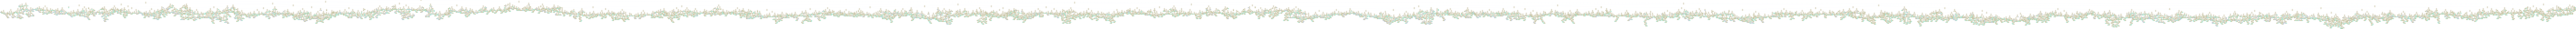

In [23]:
show_in_notebook('surrogate_tree_rental_no_prune.png', width=400, height=400)

In [27]:
# The interactiveness is not that impressive, more works needs to be done there. 
# This is just a temporary solution
show_in_notebook('surrogate_tree_rental_no_prune.png', width=900, height=400 , mode='interactive')

In [29]:
# params = {"criterion": ['gini', 'entropy'], "min_samples_leaf": [2, 4],
# "max_leaf_nodes": [2, 4, 6, 8, 10], "max_depth": [4, 6, 10, 14, 18]
# }

surrogate_explainer.learn(X_train, y_train, use_oracle=True, prune='pre', scorer_type='default')

2018-09-06 00:34:00,350 - skater.core.global_interpretation.tree_surrogate - INFO - pre pruning applied ...
2018-09-06 00:34:03,068 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (34546,)
2018-09-06 00:34:03,079 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 0.656; oracle score 0.922
2018-09-06 00:34:03,080 - skater.core.global_interpretation.tree_surrogate - WARNING - impurity score: 0.266 of the surrogate model is higher than the impurity threshold: 0.01. The higher the impurity score, lower is the fidelity/faithfulness of the surrogate model


0.266

In [30]:
surrogate_explainer.plot_global_decisions(colors=['lightsteelblue', 'darkkhaki', 'aquamarine'], 
                                          file_name='surrogate_tree_rental_pruned.png', show_img=False)

2018-09-06 00:34:37,103 - skater.util.dataops - INFO - File Name: surrogate_tree_rental_pruned.png


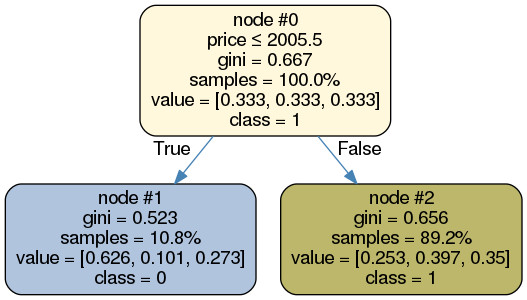

In [31]:
show_in_notebook('surrogate_tree_rental_pruned.png', width=400, height=400)

In [32]:
y_hat_val = surrogate_explainer.predict(X_val)
print("\n--------Validation/Holdout dataset classification report----------\n")
print(classification_report(y_val, y_hat_val, target_names=target_names))


--------Validation/Holdout dataset classification report----------

             precision    recall  f1-score   support

    class 0       0.25      0.34      0.29      1152
    class 1       0.73      0.93      0.82     10285
    class 2       0.00      0.00      0.00      3369

avg / total       0.52      0.68      0.59     14806



In [34]:
surrogate_explainer2 = interpreter.tree_surrogate(oracle=model_inst, class_weight="balanced", seed=5)
surrogate_explainer2.learn(X_train, y_train, use_oracle=True, prune=None, scorer_type='default')

2018-09-06 00:35:20,223 - skater.core.global_interpretation.tree_surrogate - INFO - No pruning applied ...
2018-09-06 00:35:20,428 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (34546,)
2018-09-06 00:35:20,440 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 1.0; oracle score 0.922


-0.07799999999999996

In [35]:
y_hat_val2 = surrogate_explainer2.predict(X_val)
print("\n--------Validation/Holdout dataset classification report----------\n")
print(classification_report(y_val, y_hat_val2, target_names=target_names))


--------Validation/Holdout dataset classification report----------

             precision    recall  f1-score   support

    class 0       0.32      0.26      0.29      1152
    class 1       0.78      0.84      0.81     10285
    class 2       0.38      0.31      0.34      3369

avg / total       0.65      0.68      0.66     14806



In [36]:
surrogate_explainer2.learn(X_train, y_train, use_oracle=True, prune='post', scorer_type='default')

2018-09-06 00:35:53,754 - skater.core.global_interpretation.tree_surrogate - INFO - post pruning applied ...
2018-09-06 00:35:53,961 - skater.core.global_interpretation.tree_surrogate - INFO - Scorer used <function F1._score at 0x7f48d2d42d90>
2018-09-06 00:35:53,968 - skater.core.global_interpretation.tree_surrogate - INFO - original score using base model 1.0
2018-09-06 00:37:20,605 - skater.core.global_interpretation.tree_surrogate - INFO - Summary: childrens of the following nodes are removed [3, 4, 5, 7, 10, 11, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 29, 30, 33, 35, 38, 39, 40, 41, 42, 44, 46, 48, 53, 55, 57, 60, 61, 63, 65, 67, 68, 70, 73, 76, 79, 80, 81, 84, 86, 88, 90, 91, 93, 94, 98, 100, 101, 103, 106, 109, 110, 112, 115, 116, 118, 122, 123, 127, 129, 132, 133, 134, 135, 136, 141, 143, 144, 148, 149, 150, 152, 153, 154, 155, 158, 159, 163, 164, 165, 166, 168, 171, 174, 175, 181, 183, 186, 192, 193, 194, 195, 196, 200, 201, 202, 205, 207, 209, 213, 214, 215, 217, 220, 222, 22

-0.06799999999999995

In [37]:
# The way plotting is done now is slow and not that interactive, this needs to be improved
surrogate_explainer2.plot_global_decisions(colors=['lightsteelblue', 'darkkhaki', 'aquamarine'], 
                                          file_name='surrogate_tree_rental_postpruned.png', show_img=False)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0682915 to fit



2018-09-06 00:44:00,865 - skater.util.dataops - INFO - File Name: surrogate_tree_rental_postpruned.png


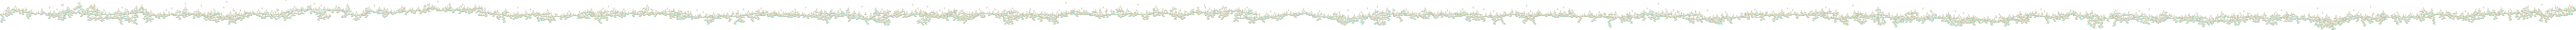

In [38]:
show_in_notebook('surrogate_tree_rental_postpruned.png', width=400, height=400)

In [39]:
# Visualization for large graphs needs to be fixed, but in the meantime
surrogate_explainer2.decisions_as_txt()

if price <= 2005.5 {
  if price <= 1700.5 {
    if price <= 1426.0 {
      if latitude <= 40.611148834228516 {
    } else {
      if bedrooms <= 1.5 {
        if longitude <= -73.94085693359375 {
          if latitude <= 40.64984893798828 {
        } else {
          if price <= 1547.0 {
            if created_day <= 20.5 {
              if longitude <= -73.9405517578125 {
                if created_day <= 8.0 {
              } else {
                if created_day <= 2.5 {
                  if latitude <= 40.743247985839844 {
                } else {
                  if no_photos <= 1.5 {
                    if longitude <= -73.91709899902344 {
                      if longitude <= -73.935546875 {
                    } else {
                      if latitude <= 40.85455322265625 {
                    }
                  } else {
                    if no_photos <= 6.5 {
                      if no_features <= 9.5 {
                        if latitude <= 40.85865020751953 {
         

                                          Predicted Label: 1
                                      } else {
                                          Predicted Label: 2
                                      }
                                    } else {
                                        Predicted Label: 2
                                    }
                                  }
                                } else {
                                  if created_month_YrMnth <= 201605.5 {
                                    if latitude <= 40.77995300292969 {
                                        Predicted Label: 1
                                    } else {
                                        Predicted Label: 2
                                    }
                                  } else {
                                      Predicted Label: 0
                                  }
                                }
                              } else {
                   

                                  } else {
                                      Predicted Label: 1
                                  }
                                } else {
                                  if no_photos <= 8.5 {
                                    if latitude <= 40.76155090332031 {
                                      if longitude <= -73.94685363769531 {
                                        if created_day <= 5.0 {
                                            Predicted Label: 2
                                        } else {
                                            Predicted Label: 0
                                        }
                                      } else {
                                        if price <= 1875.0 {
                                            Predicted Label: 2
                                        } else {
                                            Predicted Label: 1
                                        }
               

                                        Predicted Label: 2
                                    } else {
                                        Predicted Label: 1
                                    }
                                  } else {
                                      Predicted Label: 2
                                  }
                                }
                              }
                            } else {
                              if created_day <= 7.5 {
                                if no_photos <= 4.5 {
                                    Predicted Label: 1
                                } else {
                                    Predicted Label: 0
                                }
                              } else {
                                  Predicted Label: 0
                              }
                            }
                          }
                        } else {
                            Predicted Label: 2
     

            } else {
              if longitude <= -73.91944885253906 {
                if price <= 2297.5 {
                    Predicted Label: 2
                } else {
                  if price <= 2802.5 {
                      Predicted Label: 1
                  } else {
                    if created_day <= 3.0 {
                        Predicted Label: 1
                    } else {
                      if price <= 3024.5 {
                        if created_month_YrMnth <= 201605.5 {
                            Predicted Label: 2
                        } else {
                          if bedrooms <= 2.5 {
                              Predicted Label: 1
                          } else {
                              Predicted Label: 2
                          }
                        }
                      } else {
                          Predicted Label: 1
                      }
                    }
                  }
                }
              } else {
  

                                        Predicted Label: 1
                                    } else {
                                      if created_month_YrMnth <= 201604.5 {
                                          Predicted Label: 1
                                      } else {
                                          Predicted Label: 2
                                      }
                                    }
                                  } else {
                                    if longitude <= -73.95130157470703 {
                                        Predicted Label: 1
                                    } else {
                                      if longitude <= -73.9500503540039 {
                                        if latitude <= 40.773948669433594 {
                                            Predicted Label: 1
                                        } else {
                                          if bedrooms <= 0.5 {
                            

                                  Predicted Label: 2
                              }
                            } else {
                                Predicted Label: 1
                            }
                          }
                        }
                      }
                    }
                  } else {
                    if latitude <= 40.78070068359375 {
                      if no_photos <= 4.5 {
                        if latitude <= 40.7775993347168 {
                          if longitude <= -73.96084594726562 {
                            if price <= 2112.5 {
                              if created_month <= 4.5 {
                                  Predicted Label: 1
                              } else {
                                if created_month_YrMnth <= 201605.5 {
                                    Predicted Label: 2
                                } else {
                                    Predicted Label: 1
                                

                              } else {
                                  Predicted Label: 2
                              }
                            } else {
                                Predicted Label: 2
                            }
                          }
                        } else {
                            Predicted Label: 0
                        }
                      } else {
                        if no_features <= 17.0 {
                          if created_day <= 12.5 {
                            if created_month_YrMnth <= 201605.5 {
                              if latitude <= 40.76080322265625 {
                                  Predicted Label: 2
                              } else {
                                  Predicted Label: 1
                              }
                            } else {
                                Predicted Label: 2
                            }
                          } else {
                            if c

                            } else {
                              if created_month_YrMnth <= 201605.5 {
                                  Predicted Label: 1
                              } else {
                                if longitude <= -73.95834350585938 {
                                    Predicted Label: 2
                                } else {
                                    Predicted Label: 1
                                }
                              }
                            }
                          }
                        } else {
                          if price <= 3015.5 {
                            if no_photos <= 4.5 {
                                Predicted Label: 1
                            } else {
                              if latitude <= 40.78465270996094 {
                                  Predicted Label: 2
                              } else {
                                  Predicted Label: 1
                              }

                                  Predicted Label: 2
                              }
                            } else {
                                Predicted Label: 0
                            }
                          } else {
                            if price <= 2797.5 {
                                Predicted Label: 2
                            } else {
                              if created_month <= 5.5 {
                                if latitude <= 40.775047302246094 {
                                    Predicted Label: 1
                                } else {
                                  if bathrooms <= 1.25 {
                                    if latitude <= 40.778099060058594 {
                                        Predicted Label: 2
                                    } else {
                                      if price <= 2875.0 {
                                          Predicted Label: 1
                                      } else {
     

                      Predicted Label: 1
                  } else {
                    if latitude <= 40.72309875488281 {
                        Predicted Label: 1
                    } else {
                      if price <= 5547.5 {
                        if latitude <= 40.74085235595703 {
                          if price <= 5143.5 {
                              Predicted Label: 2
                          } else {
                            if created_month <= 5.5 {
                                Predicted Label: 1
                            } else {
                                Predicted Label: 2
                            }
                          }
                        } else {
                          if price <= 3997.5 {
                            if no_photos <= 14.5 {
                              if no_features <= 8.5 {
                                  Predicted Label: 1
                              } else {
                                  Predicted 

                          Predicted Label: 2
                      } else {
                        if created_day <= 4.5 {
                          if no_features <= 0.5 {
                              Predicted Label: 2
                          } else {
                              Predicted Label: 1
                          }
                        } else {
                            Predicted Label: 1
                        }
                      }
                    }
                  }
                } else {
                  if longitude <= -73.97854614257812 {
                    if price <= 2692.5 {
                      if latitude <= 40.708251953125 {
                        if price <= 2597.5 {
                          if no_features <= 11.0 {
                              Predicted Label: 0
                          } else {
                            if created_day <= 21.5 {
                                Predicted Label: 0
                            } els

                                  Predicted Label: 1
                              } else {
                                if no_features <= 2.5 {
                                    Predicted Label: 1
                                } else {
                                  if price <= 2300.0 {
                                      Predicted Label: 0
                                  } else {
                                      Predicted Label: 1
                                  }
                                }
                              }
                            }
                          } else {
                              Predicted Label: 1
                          }
                        }
                      }
                    }
                  }
                } else {
                  if latitude <= 40.63410186767578 {
                    if price <= 2200.0 {
                      if created_day <= 4.0 {
                          Predicted Label: 

                              Predicted Label: 1
                          }
                        }
                      } else {
                        if latitude <= 40.7098503112793 {
                            Predicted Label: 0
                        } else {
                          if bathrooms <= 1.5 {
                            if longitude <= -73.94760131835938 {
                                Predicted Label: 1
                            } else {
                              if longitude <= -73.94514465332031 {
                                  Predicted Label: 2
                              } else {
                                  Predicted Label: 1
                              }
                            }
                          } else {
                            if created_day <= 10.5 {
                              if no_features <= 1.5 {
                                  Predicted Label: 1
                              } else {
                   

                                      Predicted Label: 2
                                  } else {
                                      Predicted Label: 1
                                  }
                                } else {
                                    Predicted Label: 1
                                }
                              }
                            } else {
                              if created_day <= 21.5 {
                                if latitude <= 40.823997497558594 {
                                  if no_features <= 11.0 {
                                    if no_features <= 6.5 {
                                        Predicted Label: 1
                                    } else {
                                      if price <= 2722.5 {
                                        if created_day <= 17.5 {
                                            Predicted Label: 2
                                        } else {
                          

                                      Predicted Label: 1
                                  } else {
                                      Predicted Label: 0
                                  }
                                }
                              }
                            }
                          }
                        } else {
                            Predicted Label: 1
                        }
                      }
                    }
                  }
                }
              } else {
                if price <= 3201.0 {
                  if longitude <= -73.96975708007812 {
                    if longitude <= -73.98390197753906 {
                      if created_day <= 13.5 {
                          Predicted Label: 1
                      } else {
                        if no_features <= 5.5 {
                          if latitude <= 40.764949798583984 {
                              Predicted Label: 1
                          } else {
    

                                        } else {
                                          if latitude <= 40.66809844970703 {
                                            if no_photos <= 5.0 {
                                                Predicted Label: 2
                                            } else {
                                                Predicted Label: 1
                                            }
                                          } else {
                                              Predicted Label: 2
                                          }
                                        }
                                      } else {
                                          Predicted Label: 1
                                      }
                                    } else {
                                        Predicted Label: 2
                                    }
                                  } else {
                                      Pr

                                        }
                                      }
                                    } else {
                                      if price <= 3397.5 {
                                        if created_month <= 5.5 {
                                            Predicted Label: 1
                                        } else {
                                          if no_photos <= 4.0 {
                                              Predicted Label: 1
                                          } else {
                                              Predicted Label: 2
                                          }
                                        }
                                      } else {
                                        if created_day <= 5.0 {
                                          if longitude <= -73.97340393066406 {
                                              Predicted Label: 1
                                          } else {

                                Predicted Label: 0
                            } else {
                              if longitude <= -74.00279998779297 {
                                  Predicted Label: 0
                              } else {
                                  Predicted Label: 2
                              }
                            }
                          }
                        } else {
                          if longitude <= -73.9780502319336 {
                            if no_photos <= 4.5 {
                                Predicted Label: 2
                            } else {
                              if longitude <= -73.98164367675781 {
                                  Predicted Label: 2
                              } else {
                                  Predicted Label: 1
                              }
                            }
                          } else {
                            if created_day <= 4.5 {
                

                                          Predicted Label: 1
                                      }
                                    }
                                  } else {
                                      Predicted Label: 1
                                  }
                                } else {
                                    Predicted Label: 1
                                }
                              }
                            } else {
                              if latitude <= 40.72745132446289 {
                                if no_photos <= 5.5 {
                                  if no_features <= 8.5 {
                                      Predicted Label: 1
                                  } else {
                                      Predicted Label: 2
                                  }
                                } else {
                                  if price <= 5247.5 {
                                      Predicted Label: 1
   

                                                  }
                                                } else {
                                                    Predicted Label: 2
                                                }
                                              } else {
                                                if created_month_YrMnth <= 201605.5 {
                                                    Predicted Label: 2
                                                } else {
                                                    Predicted Label: 1
                                                }
                                              }
                                            }
                                          } else {
                                              Predicted Label: 1
                                          }
                                        } else {
                                          if price <= 5825.0 {
              

                                  Predicted Label: 1
                              }
                            }
                          } else {
                            if created_day <= 14.5 {
                              if latitude <= 40.74555206298828 {
                                  Predicted Label: 1
                              } else {
                                if latitude <= 40.77839660644531 {
                                    Predicted Label: 2
                                } else {
                                    Predicted Label: 1
                                }
                              }
                            } else {
                                Predicted Label: 1
                            }
                          }
                        } else {
                            Predicted Label: 1
                        }
                      } else {
                        if price <= 4697.5 {
                            

                                }
                              }
                            }
                          }
                        }
                      } else {
                        if no_photos <= 5.5 {
                            Predicted Label: 1
                        } else {
                          if created_day <= 17.5 {
                            if created_month <= 4.5 {
                              if created_day <= 2.5 {
                                  Predicted Label: 1
                              } else {
                                if price <= 6675.0 {
                                    Predicted Label: 1
                                } else {
                                    Predicted Label: 2
                                }
                              }
                            } else {
                                Predicted Label: 1
                            }
                          } else {
                   

In [40]:
y_hat_val2 = surrogate_explainer2.predict(X_val)
print("\n--------Validation/Holdout dataset classification report----------\n")
print(classification_report(y_val, y_hat_val2, target_names=target_names))


--------Validation/Holdout dataset classification report----------

             precision    recall  f1-score   support

    class 0       0.32      0.30      0.31      1152
    class 1       0.78      0.84      0.81     10285
    class 2       0.38      0.30      0.34      3369

avg / total       0.65      0.67      0.66     14806



In [41]:
surrogate_explainer3 = interpreter.tree_surrogate(oracle=model_inst, class_weight="balanced", seed=5)
surrogate_explainer3.learn(X_train, y_train, use_oracle=False, prune='post', scorer_type='default')

2018-09-06 00:45:44,866 - skater.core.global_interpretation.tree_surrogate - INFO - post pruning applied ...
2018-09-06 00:45:45,095 - skater.core.global_interpretation.tree_surrogate - INFO - Scorer used <function F1._score at 0x7f48d2d42d90>
2018-09-06 00:45:45,101 - skater.core.global_interpretation.tree_surrogate - INFO - original score using base model 0.9984959816669274
2018-09-06 00:47:55,878 - skater.core.global_interpretation.tree_surrogate - INFO - Summary: childrens of the following nodes are removed [3, 4, 7, 8, 9, 10, 14, 15, 19, 20, 21, 23, 24, 25, 26, 27, 29, 35, 36, 39, 40, 41, 45, 47, 48, 52, 53, 54, 55, 57, 60, 61, 62, 63, 69, 70, 71, 72, 73, 76, 77, 80, 83, 84, 86, 87, 88, 90, 91, 92, 96, 100, 101, 103, 107, 109, 110, 115, 117, 118, 119, 120, 121, 122, 123, 125, 126, 128, 136, 140, 141, 142, 144, 147, 148, 149, 150, 151, 152, 154, 157, 159, 164, 166, 167, 168, 169, 174, 175, 178, 179, 181, 184, 185, 189, 192, 193, 200, 201, 202, 203, 205, 207, 208, 210, 211, 216, 217

-0.06599999999999995

## Evaluating on supplied test dataset

In [42]:
# using base estimator
X_test = df_test[features_considered]
y_hat_test_base_model = gbm.predict_proba(X_test)
assert X_test.shape[0] == y_hat_test_base_model.shape[0]

y_hat_test_surrogate = surrogate_explainer.predict(X_test, prob_score=True)
assert X_test.shape[0] == y_hat_test_surrogate.shape[0]

y_hat_test_surrogate_pp = surrogate_explainer2.predict(X_test, prob_score=True)
assert X_test.shape[0] == y_hat_test_surrogate_pp.shape[0]

y_hat_test_surrogate_i = surrogate_explainer3.predict(X_test, prob_score=True)
assert X_test.shape[0] == y_hat_test_surrogate_i.shape[0]

In [43]:
## constructing the format needed for submission
list_id = df_test['listing_id'].tolist()
# base
predictions = pd.DataFrame(y_hat_test_base_model, columns=['high', 'low', 'medium'])
result_df_base = predictions
result_df_base.loc[:, 'listing_id'] = pd.Series(list_id, index=result_df_base.index)
# re-arrange the columns
result_df_base = result_df_base[['listing_id', 'high', 'low', 'medium']]

# Surrogate
predictions = pd.DataFrame(y_hat_test_surrogate, columns=['high', 'low', 'medium'])
result_df_surrogate = predictions
result_df_surrogate.loc[:, 'listing_id'] = pd.Series(list_id, index=result_df_surrogate.index)
# re-arrange the columns
result_df_surrogate = result_df_surrogate[['listing_id', 'high', 'low', 'medium']]

# Surrogate-pp
predictions = pd.DataFrame(y_hat_test_surrogate_pp, columns=['high', 'low', 'medium'])
result_df_surrogate_pp = predictions
result_df_surrogate_pp.loc[:, 'listing_id'] = pd.Series(list_id, index=result_df_surrogate_pp.index)
# re-arrange the columns
result_df_surrogate_pp = result_df_surrogate_pp[['listing_id', 'high', 'low', 'medium']]

# a better interpretable tree using post-pruning
predictions = pd.DataFrame(y_hat_test_surrogate_i, columns=['high', 'low', 'medium'])
result_df_surrogate_i = predictions
result_df_surrogate_i.loc[:, 'listing_id'] = pd.Series(list_id, index=result_df_surrogate_i.index)
# re-arrange the columns
result_df_surrogate_i = result_df_surrogate_i[['listing_id', 'high', 'low', 'medium']]

In [44]:
# converting to csv
result_df_base.to_csv('submission_base.csv', index=False)
result_df_surrogate.to_csv('submission_surrogate.csv', index=False)
result_df_surrogate_pp.to_csv('submission_spp.csv', index=False)
result_df_surrogate_i.to_csv('submission_i.csv', index=False)